In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline


In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

print(recent_grads[['Major','Total']])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [3]:
#num of raw data rows
raw_data_cnt = len(recent_grads.values)
print(raw_data_cnt)

recent_grads.dropna(axis=0, how='any', inplace=True)
cleaned_data_count = len(recent_grads.values)
print(cleaned_data_count)

#we dropped one row(exactly one row contained NaN value)

173
172


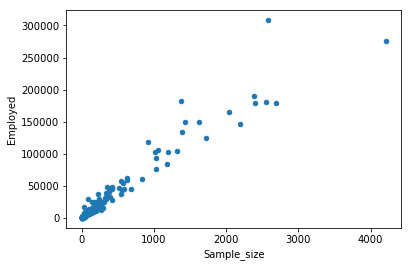

In [4]:
#this is very good example of positive correlation
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

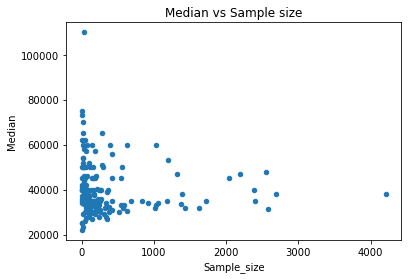

In [5]:
#no correlation
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs Sample size')

45000.0


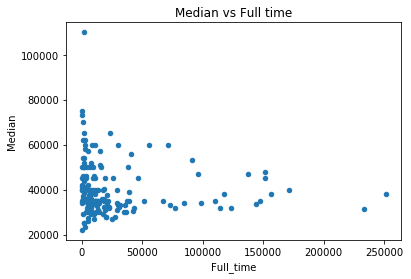

In [6]:
#by observing plot in this cell we can say there is very weak negative correlation
#as full_time employee count grows the median salary tends to drop
P05_median = recent_grads['Median'].quantile(.05)
P85_median = recent_grads['Median'].quantile(.75)
print(P85_median)

recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs Full time')

"\nby observing plots below i'd say that when it comes to majors where majority is women are making less money\nbut correlation between median and women is very very very weak(if exists at all) \nand tends to drop median while women count increases\nstill majors which have low count of women and men generate most money\nmajors which have low value of total people but generally more men produces more money\n"

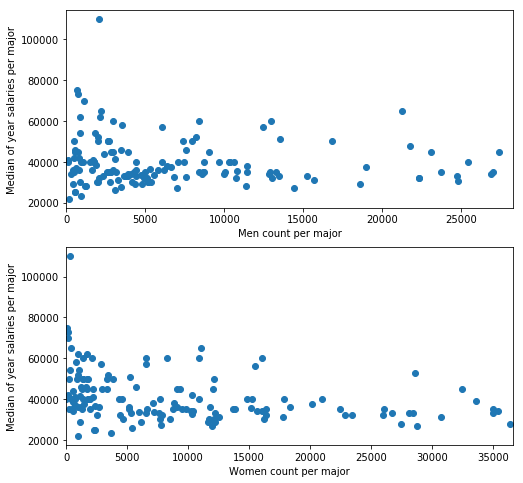

In [7]:
fig = plt.figure(figsize=(8,8))
'''
take ranges for men/women count per major up to percentile of 85
i did this cuz it dramatically reduces range of x-axis and it excludes only 15% of the vector
reducing range makes plot 'zoomed' and easier to understand correlation in cases where majority of population is in
much lower range than highest 10-15%
'''
men_xlimrange = (0,recent_grads['Men'].quantile(.85))
women_xlimrange =(0,recent_grads['Women'].quantile(.85))


men_median = fig.add_subplot(2,1,1)
men_median.scatter(x=recent_grads['Men'], y=recent_grads['Median'])
men_median.set_xlim(men_xlimrange)
men_median.set_xlabel('Men count per major')
men_median.set_ylabel('Median of year salaries per major')
women_median = fig.add_subplot(2,1,2)
women_median.scatter(x=recent_grads['Women'], y=recent_grads['Median'])
women_median.set_xlabel('Women count per major')
women_median.set_ylabel('Median of year salaries per major')
women_median.set_xlim(women_xlimrange)


'''
by observing plots below i'd say that when it comes to majors where majority is women are making less money
but correlation between median and women is very very very weak(if exists at all) 
and tends to drop median while women count increases
still majors which have low count of women and men generate most money
majors which have low value of total people but generally more men produces more money
'''

0.10      1991.80
0.50     15104.00
0.75     38909.75
0.80     53087.20
0.90    124109.90
1.00    393735.00
Name: Total, dtype: float64


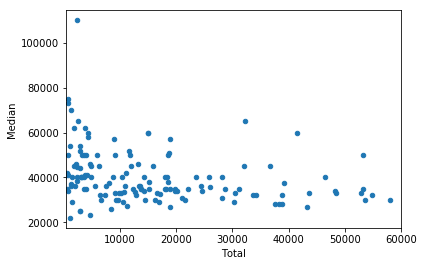

In [63]:
'''
if we consider majors popularity by total column and say some major brings more money than other major 
if median of some major > median of other major then we can say by scatter plot below 
that there is very weak negative correlation between these two
conclusion is that there are few majors that have <10000 students and they have higher medians
so majors that have more students do not bring more money as well
also i limited x axis from 500 people to 60000 since this is were 80% of the majors fall and it is much easier
to observe the correlation

'''
recent_grads.plot(x='Total', y='Median', kind='scatter', xlim=(500,60000))

print(recent_grads['Total'].quantile([.1,.5,.75,.8,.9,1]))


In [9]:
#lets find majors which have more femals than males
more_females = recent_grads['Women'] > recent_grads['Men']
more_females_df = recent_grads[more_females]
print(more_females_df[:1])
more_femals_money_median = more_females_df['Median']


#idk why i did this, although won't remove it

   Rank  Major_code                       Major   Total    Men  Women  \
7     8        5001  ASTRONOMY AND ASTROPHYSICS  1792.0  832.0  960.0   

      Major_category  ShareWomen  Sample_size  Employed      ...        \
7  Physical Sciences    0.535714           10      1526      ...         

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
7        553                   827          33           0.021167   62000   

   P25th   P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
7  31500  109000           972               500            220  

[1 rows x 21 columns]


[ 60.  78.  20.  11.   2.   0.   1.]
172.0
[  22000.           34571.42857143   47142.85714286   59714.28571429
   72285.71428571   84857.14285714   97428.57142857  110000.        ]


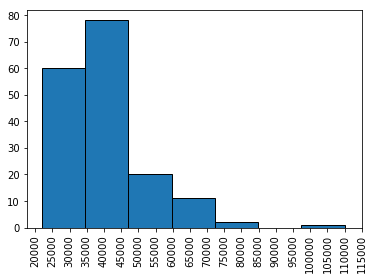

In [10]:
n, bins, pathces = plt.hist(recent_grads['Median'], bins=7, edgecolor='black')
plt.xticks(np.arange(20000,120000,5000), rotation=90)
print(n)
print(sum(n))
print(bins)
#most common median salary range is 34000-47000 with count of 78

     Total      Men    Women  ShareWomen
0   2339.0   2057.0    282.0    0.120564
1    756.0    679.0     77.0    0.101852
2    856.0    725.0    131.0    0.153037
3   1258.0   1123.0    135.0    0.107313
4  32260.0  21239.0  11021.0    0.341631
5   2573.0   2200.0    373.0    0.144967
6   3777.0   2110.0   1667.0    0.441356
7   1792.0    832.0    960.0    0.535714
8  91227.0  80320.0  10907.0    0.119559
9  81527.0  65511.0  16016.0    0.196450
[ 5.  1.  1.  0.  0.  1.  0.  1.  0.  1.]
[ 0.10185185  0.1452381   0.18862434  0.23201058  0.27539683  0.31878307
  0.36216931  0.40555556  0.4489418   0.49232804  0.53571429]
[ 1.  0.  1.  0.  1.  0.  0.  1.  1.  5.]
[ 0.46428571  0.50767196  0.5510582   0.59444444  0.63783069  0.68121693
  0.72460317  0.76798942  0.81137566  0.8547619   0.89814815]


'\nWell what we wrote above in comments seems like it is true after obesrving histograms\n'

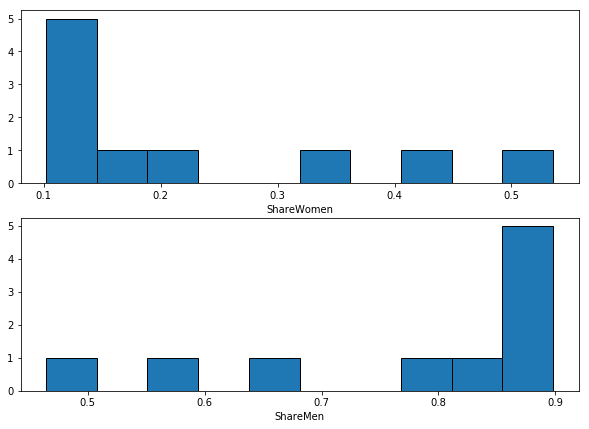

In [11]:
recent_grads_ten = recent_grads[0:10].copy()
print(recent_grads_ten[['Total','Men','Women', 'ShareWomen']])
#90% of majors have more men in this small df
#10% of majors have more women in this small df

#lets plot this too see how histogram shows it
recent_grads_ten['ShareMen'] = recent_grads_ten['Men'] / recent_grads_ten['Total']
cols = ['ShareWomen', 'ShareMen']

fig = plt.figure(figsize=(10,7))

for i in range(len(cols)):
    ax = fig.add_subplot(2,1,i+1)
    ax.set_xlabel(cols[i])
    n, bins, patches = ax.hist(recent_grads_ten[cols[i]], edgecolor='black')
    print(n)
    print(bins)
'''
Well what we wrote above in comments seems like it is true after obesrving histograms
'''

[  3.  14.  16.  22.  19.  21.  25.  29.  11.  12.]
[ 0.          0.09689537  0.19379074  0.2906861   0.38758147  0.48447684
  0.58137221  0.67826758  0.77516295  0.87205831  0.96895368]
44.1860465116
55.8139534884


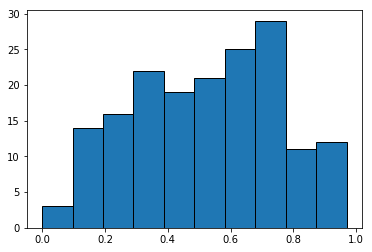

In [35]:
'''
OK we have found answers on 'What percent of majors are predominantly male? Predominantly female?' for first 10 rows
in data set, seen how to observe it and make conclusion from both visualizing and just watching the raw data
(we could watch the raw data itself cuz there was just 10 rows ofc)

Since we cannot tell the answer for the whole data-set by just observing raw-data we will plot it on histogram
and make a conclusion
'''
fig,ax = plt.subplots()
n , bins, patches = ax.hist(recent_grads['ShareWomen'], edgecolor='black')
print(n)
print(bins)

'''
by observing plot below i would say that there are about 42% majors that have more men
and 58% for women
Let's make some calculations to proove this
'''

more_men = recent_grads['Men'] > recent_grads['Women']
more_men_cnt = more_men.value_counts().loc[True]
more_men_majors_percentage = (more_men_cnt / len(recent_grads))*100
print(more_men_majors_percentage)

'''
I was accurate, real percentage for majors that men dominate is 44%, by just observing histogram 
along side with it' frequency list and bins list i came up with ~42% answer!


Let's fetch now percentage for majors where women dominate
'''

more_women_majors_percentage = 100-more_men_majors_percentage
print(more_women_majors_percentage)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea87794438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fea87698780>]], dtype=object)

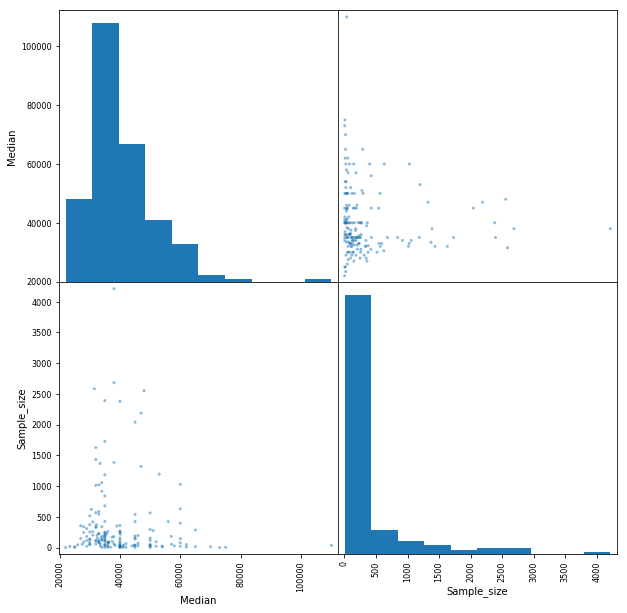

In [23]:
scatter_matrix(recent_grads[['Median','Sample_size']], figsize=(10,10))
'''
we can see as sample_size grows median usually tends to be lower
which means as bigger the sample is for a given major it's median year rounded salary tends to be lower
'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea86e16438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fea8699fa20>]], dtype=object)

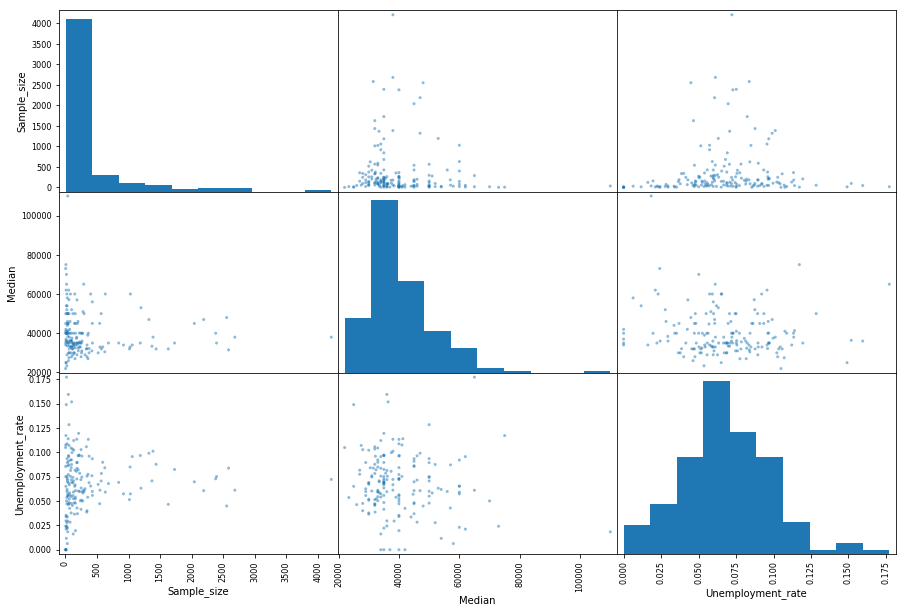

In [36]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,10))

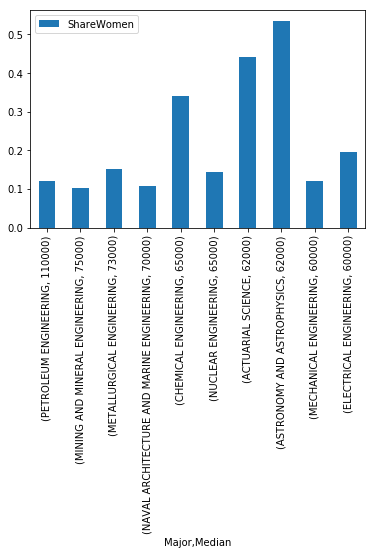

In [71]:
'''
df is already sorted by rank.
Rank displays ranking for the major based on it's median earnings
'''
recent_grads[0:10].plot.bar(x=['Major','Median'], y='ShareWomen')

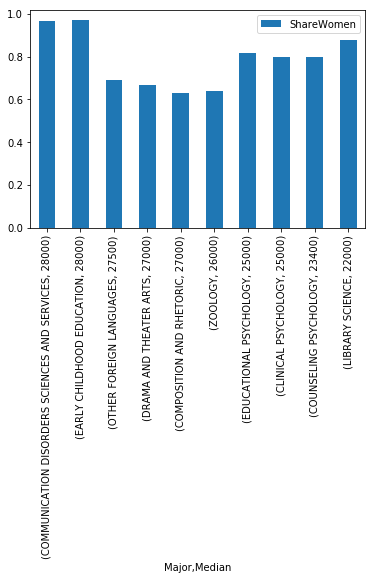

In [70]:
recent_grads[-10:].plot.bar(x=['Major','Median'], y='ShareWomen')

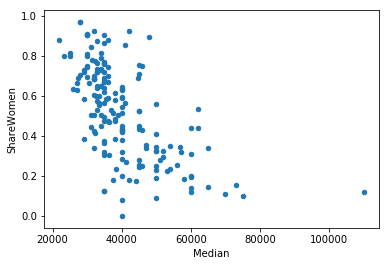

In [69]:
'''
    By observing two plots above we can say that there is low percentage of women in highest paid majors
    and high percentage of women in lowest paid majors
    So i was curious then to see the correlation between 
    Median( represents median for the year rounded salary in the major) and
    ShareWomen ( represents percentage of the women in the major)


    By observing plot below we can see that there is strong negative correlation between the two
    As the share of women in major drops median tends to be higher
'''
recent_grads.plot(x='Median', y='ShareWomen', kind='scatter')

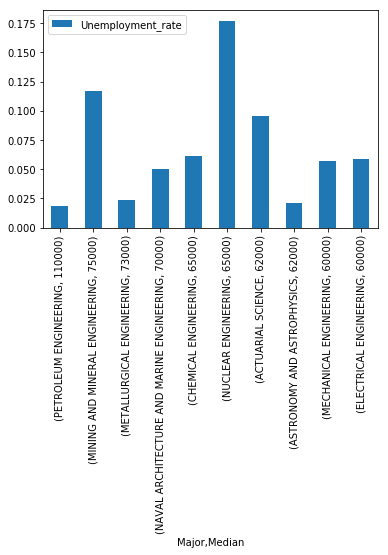

In [67]:
recent_grads[:10].plot.bar(x=['Major', 'Median'], y='Unemployment_rate')

' \nBy observing two plots above we can say that generally unemp\nrate is higher in the most poor  majors than in the most paid majors\n '

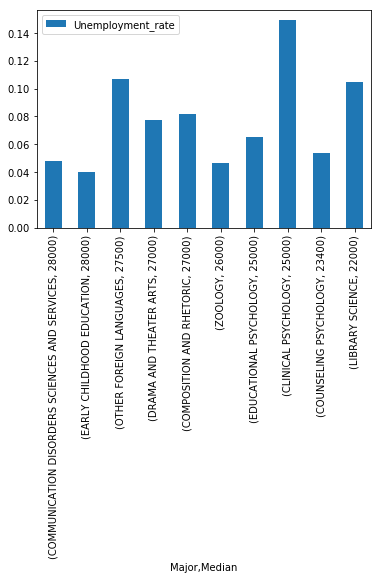

In [75]:
recent_grads[-10:].plot.bar(x=['Major','Median'], y='Unemployment_rate')


In [76]:
''' 
By observing two plots above we can say that generally unemp
rate is higher in the most poor  majors than in the most paid majors
 '''

' \nBy observing two plots above we can say that generally unemp\nrate is higher in the most poor  majors than in the most paid majors\n '